In [1]:
import os

import torch
from detr_config import Config
from detr_dataset import InBreastDataset, collate_fn
from detr_detection import plot_annotations, plot_results
from detr_model import DETRModel
from PIL import Image
from torch.utils.data import DataLoader
from transformers import DetrImageProcessor
import numpy as np

In [2]:
model_name = 'model=DETR_backbone=resnet50_queries=50_dmodel=256_layers=6'

model = DETRModel.load_from_checkpoint(
    f'./lightning_logs/{model_name}/fold_2/checkpoints/last.ckpt',
    # f'./lightning_logs/{model_name}/fold_1/checkpoints/last.ckpt',
    map_location = torch.device('cpu')
)

id2label = model.detr_model.config.id2label

image_processor = DetrImageProcessor()

dataset_dir = os.path.join(Config.DATASET, 'test')

dataset_dir = os.path.join(Config.DATASET, 'fold_1', 'train')

dataset = InBreastDataset(
    images_path = dataset_dir,
    processor=image_processor
)

dataloader = DataLoader(
    dataset = dataset,
    batch_size = 8,
    collate_fn = collate_fn,
)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


c:\ProgramData\miniconda3\envs\detr-env\Lib\site-packages\pytorch_lightning\utilities\parsing.py:197: UserWarning: Attribute 'detr_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['detr_model'])`.
  rank_zero_warn(


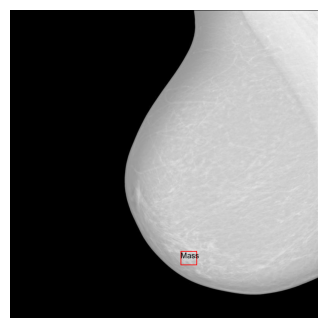

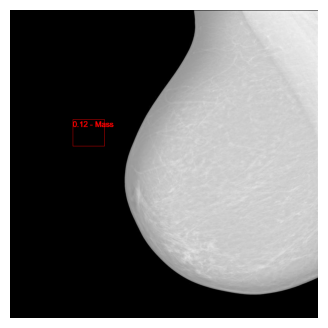

In [7]:
image_id = 3
pixel_values, labels = dataset.__getitem__(image_id)
image_data = dataset.coco.loadImgs(image_id)[0]

image = Image.open(os.path.join(dataset_dir, image_data['file_name']))
annotations = dataset.coco.imgToAnns[image_id]

with torch.no_grad():
    model.eval()
    outputs = model(pixel_values=pixel_values.unsqueeze(0))

predictions = image_processor.post_process_object_detection(
                outputs, target_sizes=[(800, 800)], threshold=0.01)

results = predictions[0]

plot_annotations(image.copy(), annotations, id2label)

plot_results(image.copy(), results, id2label)
